In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


Memory Reduction

In [3]:
def reduce_memo(df):
    for col in df.columns:
        if df[col].dtype =="float64":
            df[col]=df[col].astype('float32')

        elif df[col].dtype=='int64':
            df[col]=df[col].astype('int32')       
    return df    

LOAD THE DATA

In [4]:
departments=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\departments.csv")
orders=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\orders.csv")
order_product=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\order_products__prior.csv")
product=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\products.csv")
aisle=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\aisles.csv")

In [5]:
orders= reduce_memo(orders)
departments=reduce_memo(departments)
order_product=reduce_memo(order_product)
product=reduce_memo(product)
aisle=reduce_memo(aisle)

Look at the Data

In [6]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We will join our data into one df

In [8]:
complete_df=pd.merge(order_product,product,how='inner',on='product_id')
complete_df=pd.merge(complete_df,departments,how='inner',on='department_id')
complete_df=pd.merge(complete_df,aisle,how='inner',on='aisle_id')
complete_df=pd.merge(complete_df,orders,how='inner',on='order_id')
complete_df.head()
sample_df=complete_df.sample(200000,random_state=42)

EDA


Look at data

In [9]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float32
dtypes: float32(1), int32(10), object(4)
memory usage: 2.3+ GB


Summary of Data

In [10]:
complete_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110406e+01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.377106e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


Distrubution of days since prior order

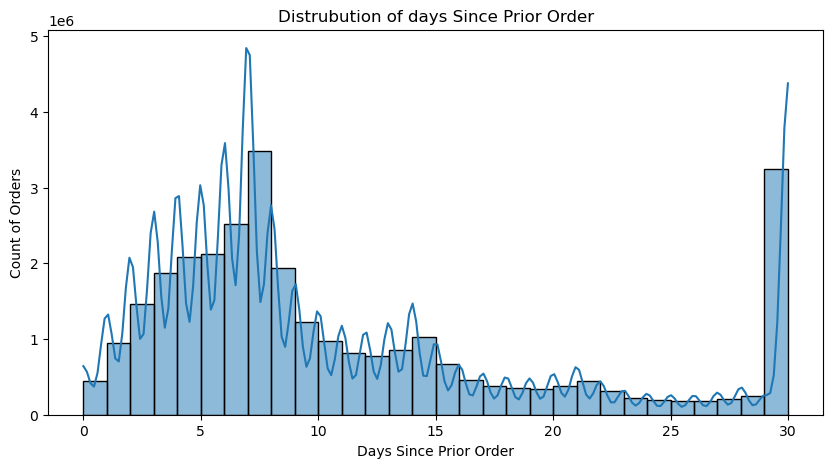

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(complete_df['days_since_prior_order'],bins=30,kde=True)
plt.title("Distrubution of days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count of Orders")
plt.show() 

Top 30 Product Orderd

Text(0.5, 1.0, 'Top 30 Product Ordred')

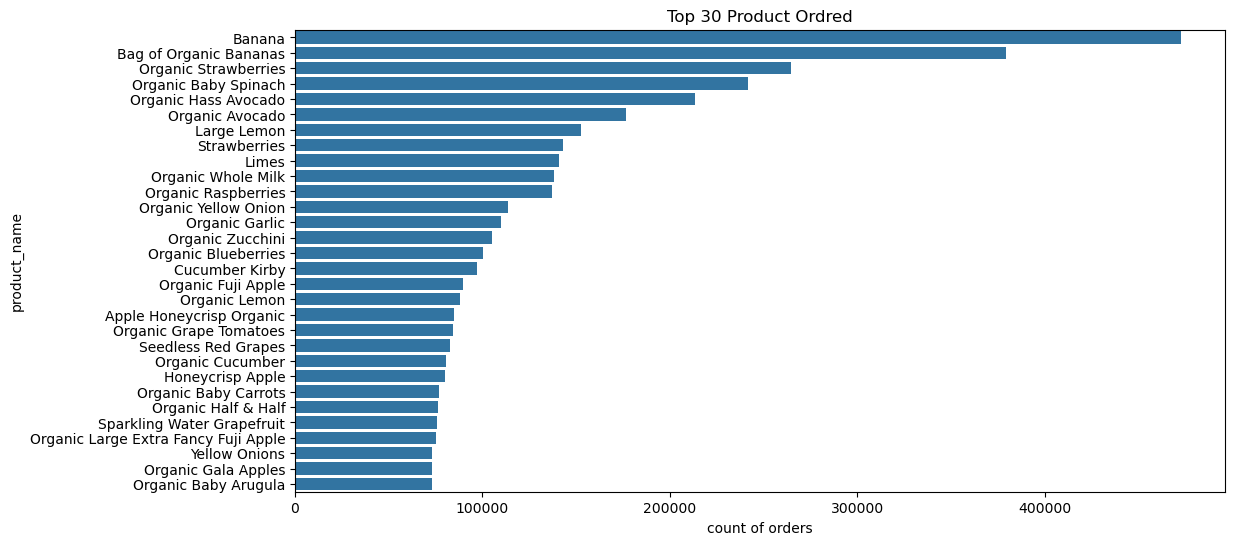

In [12]:
most_ordered=complete_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=most_ordered,y=most_ordered.index)
plt.xlabel("count of orders")
plt.title("Top 30 Product Ordred")

Day Of Week Plot

<Axes: xlabel='order_dow', ylabel='Count'>

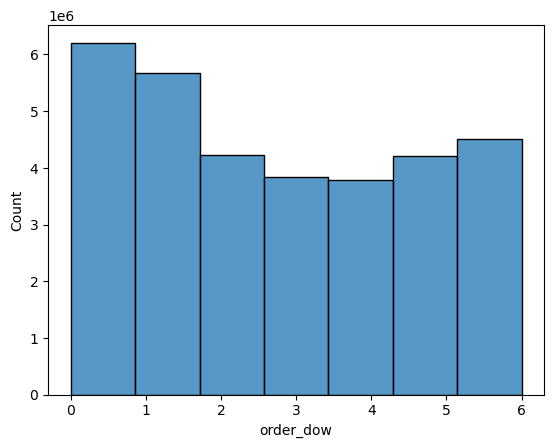

In [13]:
sns.histplot(complete_df['order_dow'],bins=7,kde=False)

Order Per department

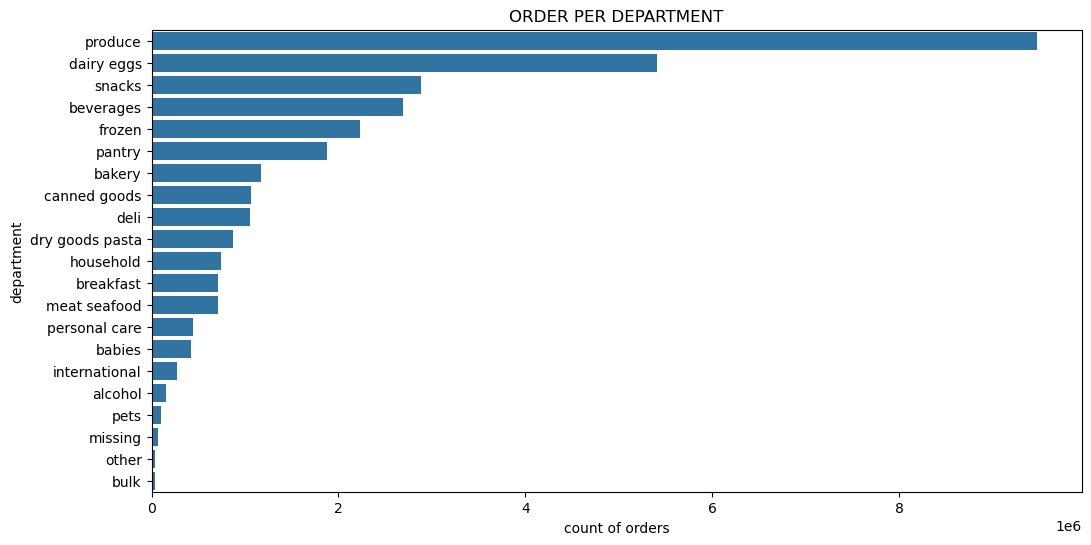

In [14]:
top_departments=complete_df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_departments,y=top_departments.index)
plt.xlabel("count of orders")
plt.title("ORDER PER DEPARTMENT")
plt.show()

Number of orders per users

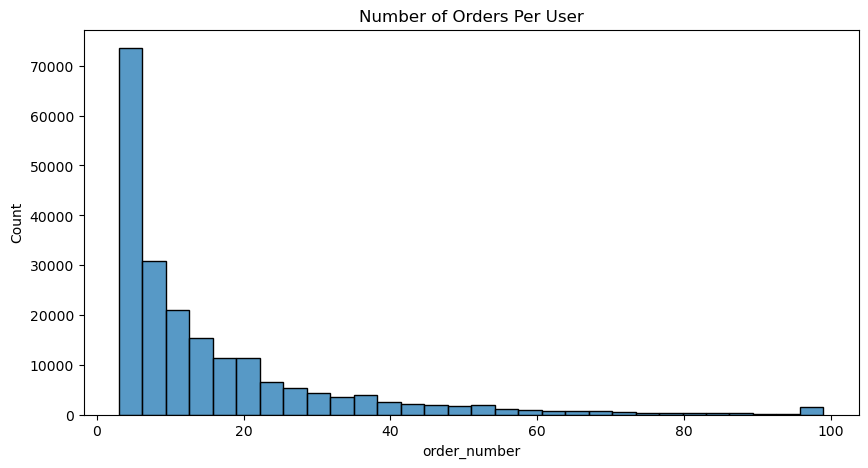

In [15]:
user_order=complete_df.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,5))
sns.histplot(user_order,bins=30)
plt.title("Number of Orders Per User")
plt.show()


Reorderd Vs orderd


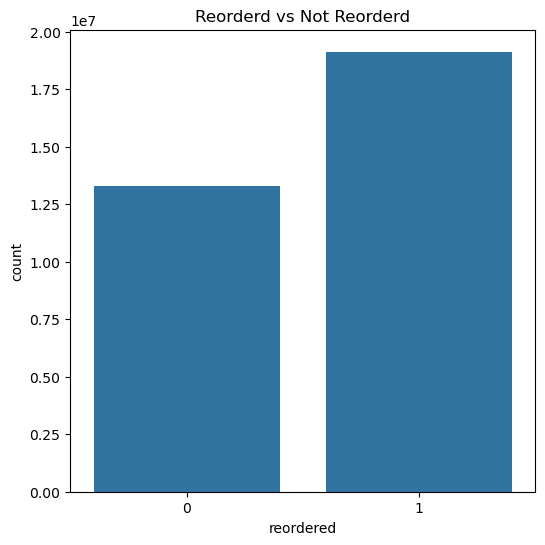

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()

The Top 20 aisle

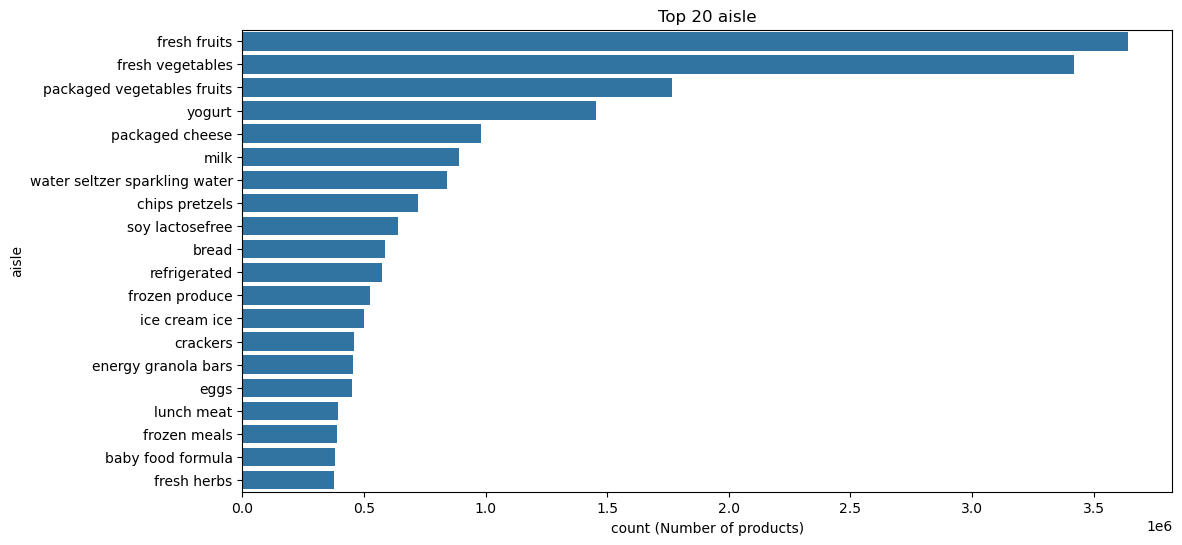

In [17]:
top_aisle=complete_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_aisle,y=top_aisle.index)
plt.title("Top 20 aisle")
plt.xlabel("count (Number of products)")
plt.ylabel("aisle")
plt.show()

REorder VS Order number

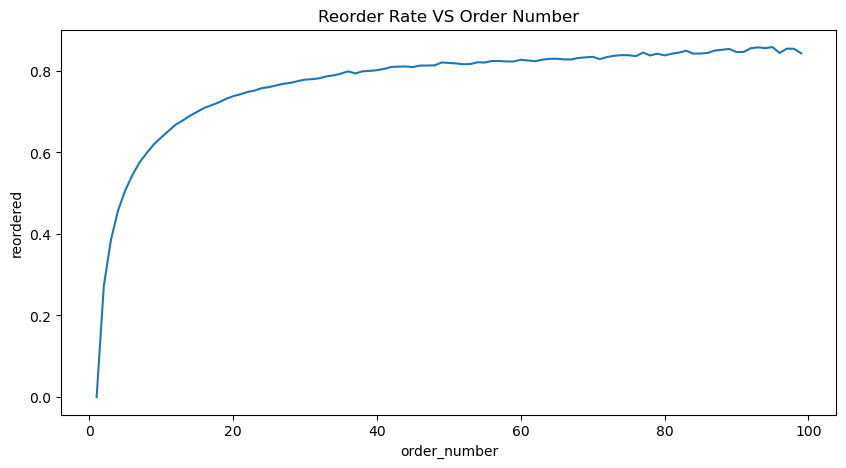

In [18]:
order_ordernum=complete_df.groupby('order_number')['reordered'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=order_ordernum,x='order_number',y='reordered')
plt.title("Reorder Rate VS Order Number")
plt.show()

Handle Numrical Features

In [19]:
num_cols=complete_df.select_dtypes(include=['int32','float32','int64','float64']).columns
num_cols

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

Handle Categorical Features

In [20]:
cat_cols=complete_df.select_dtypes(include=['object']).columns
cat_cols

Index(['product_name', 'department', 'aisle', 'eval_set'], dtype='object')

Correlation For Numrical Featuers ("Heatmap")

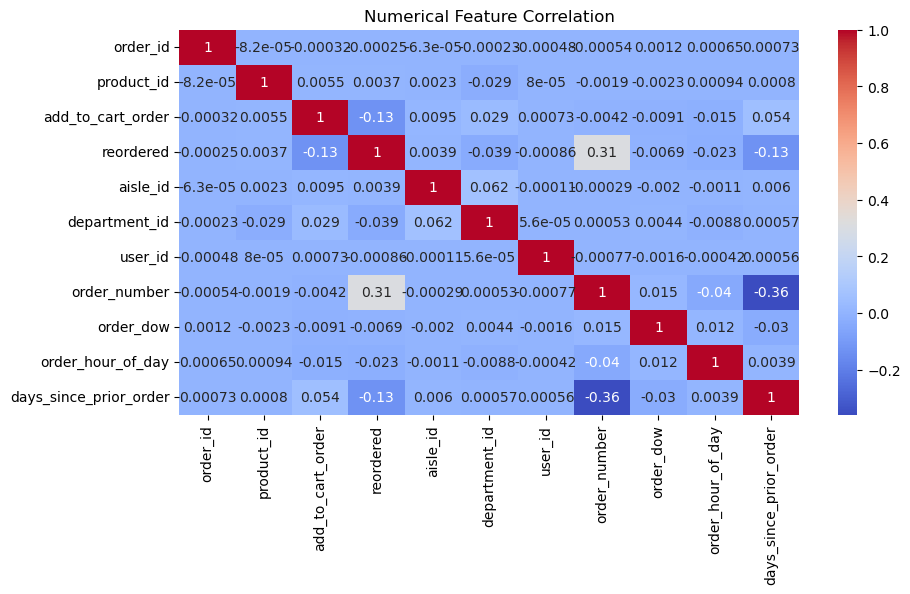

In [21]:
plt.figure(figsize=(10,5))
correlation_matrix=complete_df[num_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()

Correlation For Numrical Featuers ("pairwise scatter")

<Figure size 800x900 with 0 Axes>

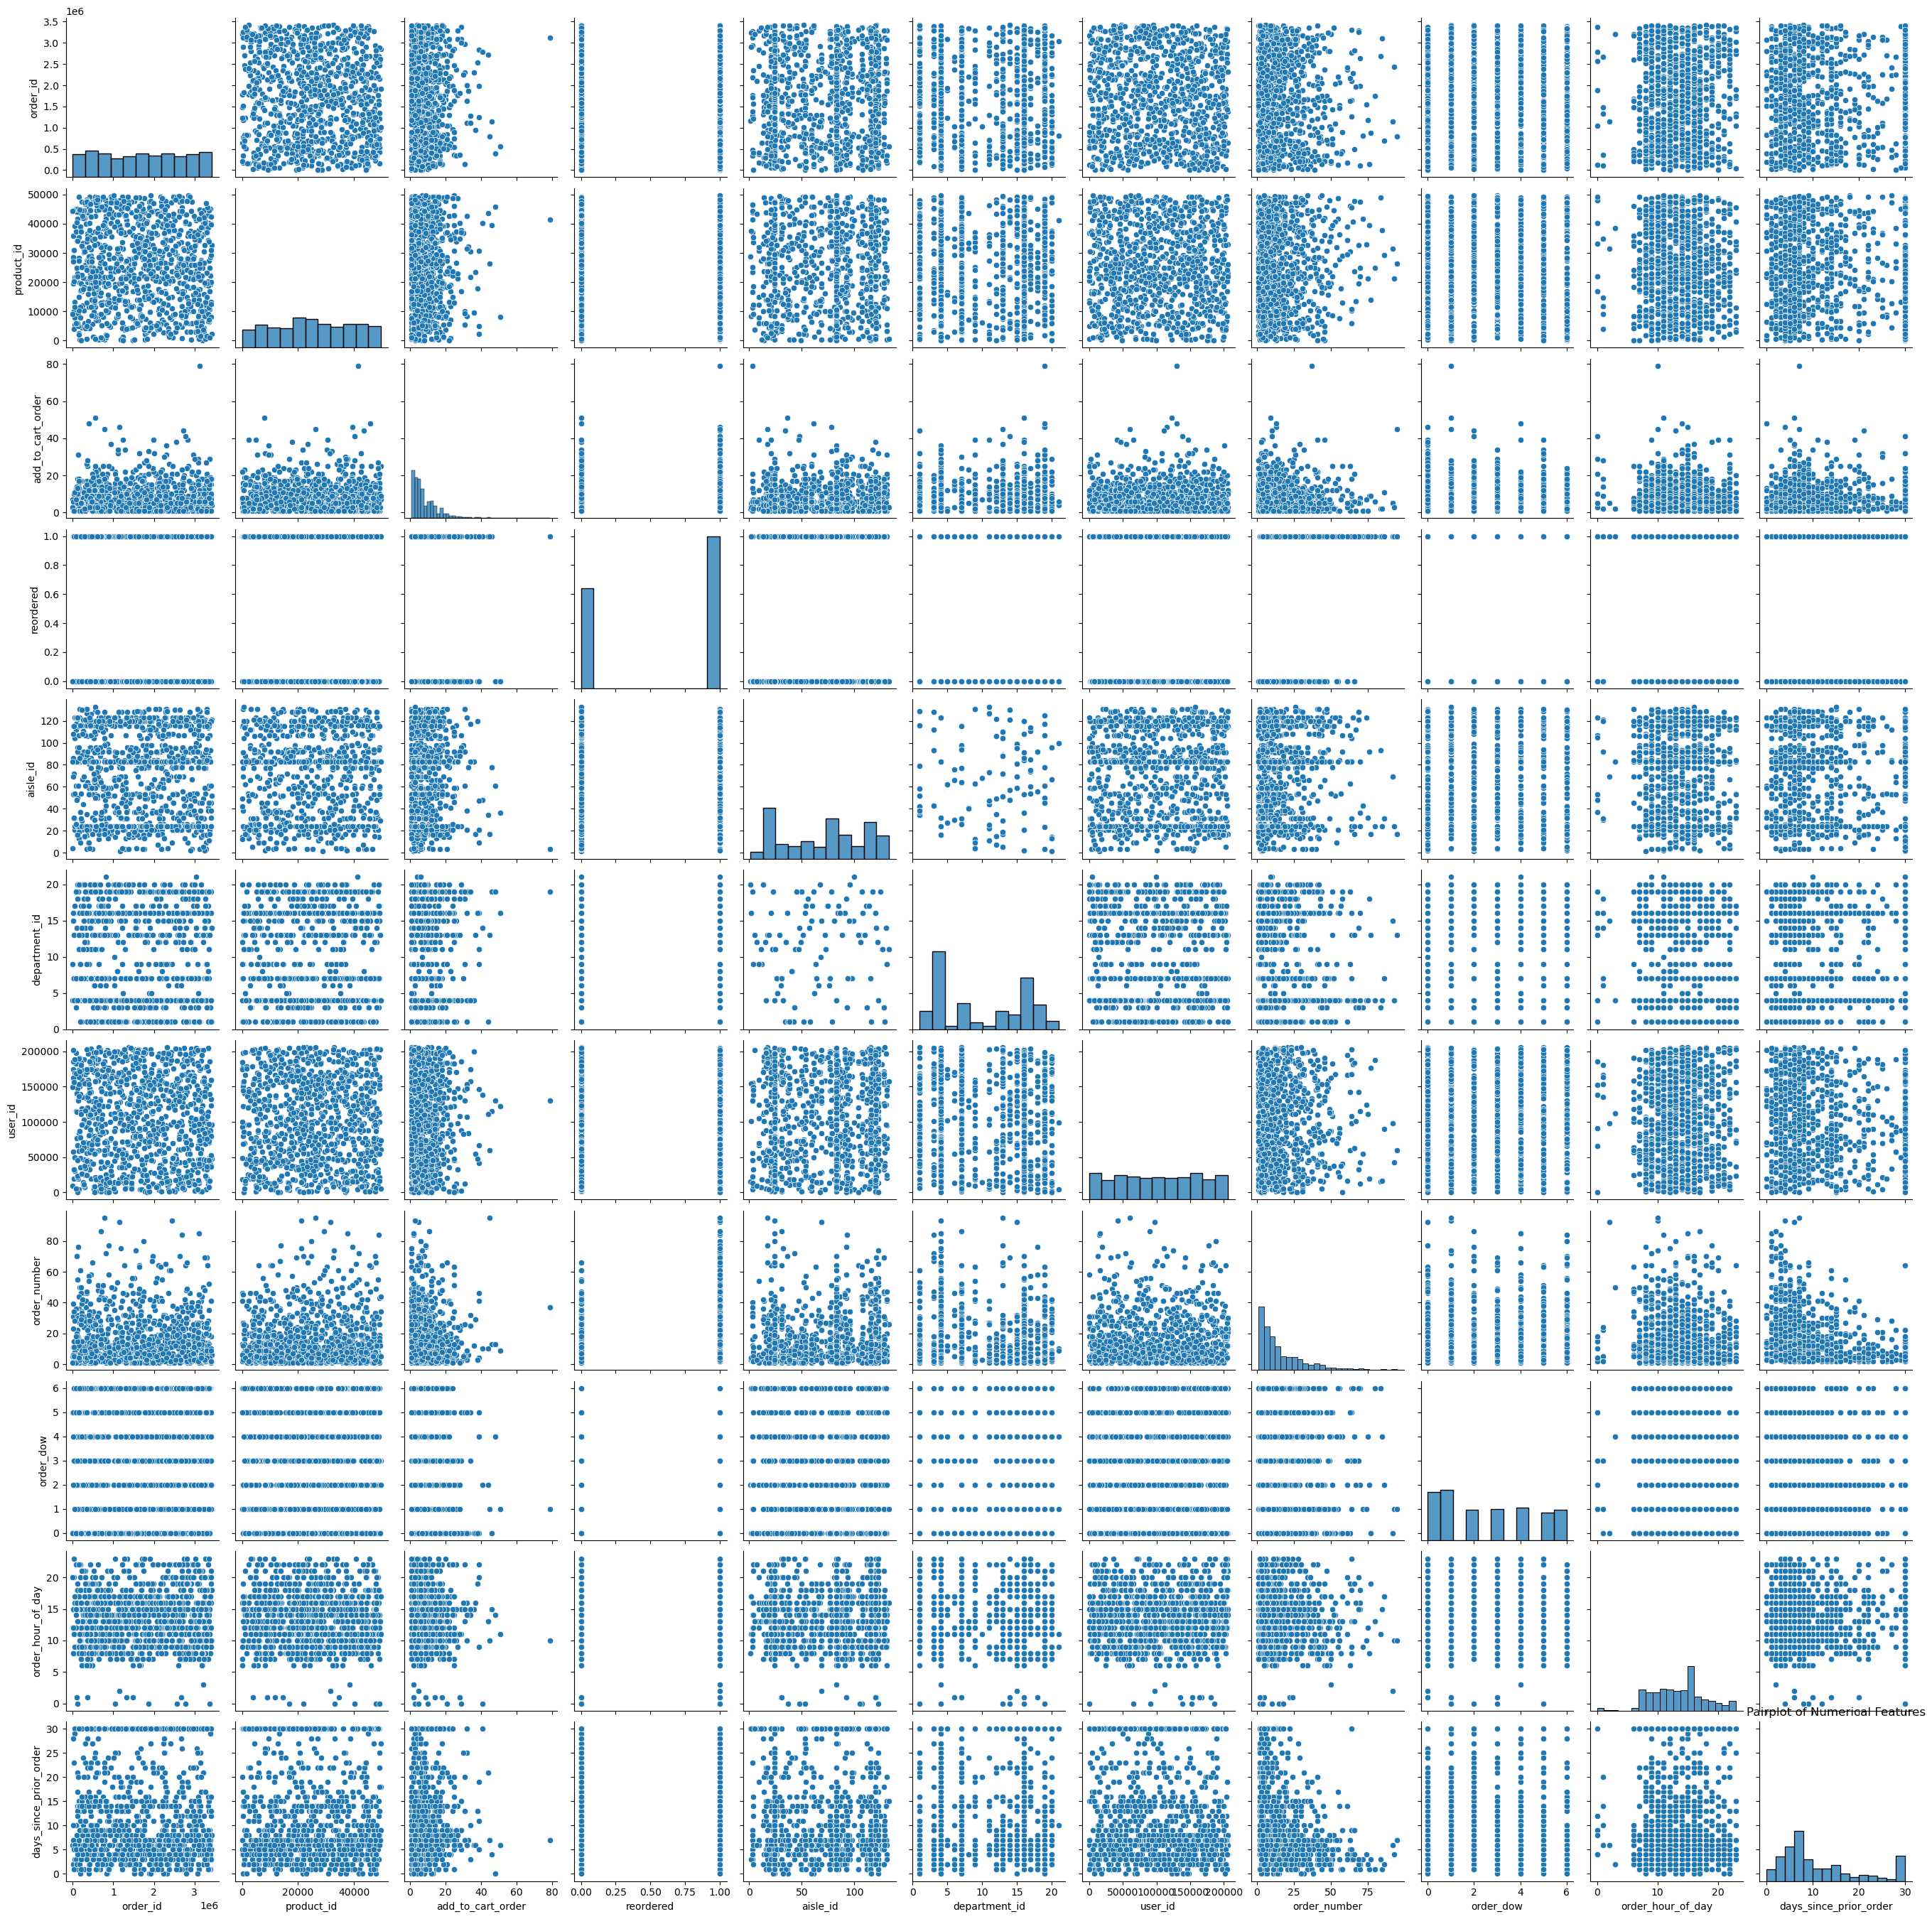

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,9))
sample_df=complete_df.sample(1000,random_state=42)
sns.pairplot(sample_df[num_cols]) 
plt.title("Pairplot of Numerical Features")
plt.show()

Time Of Day plot

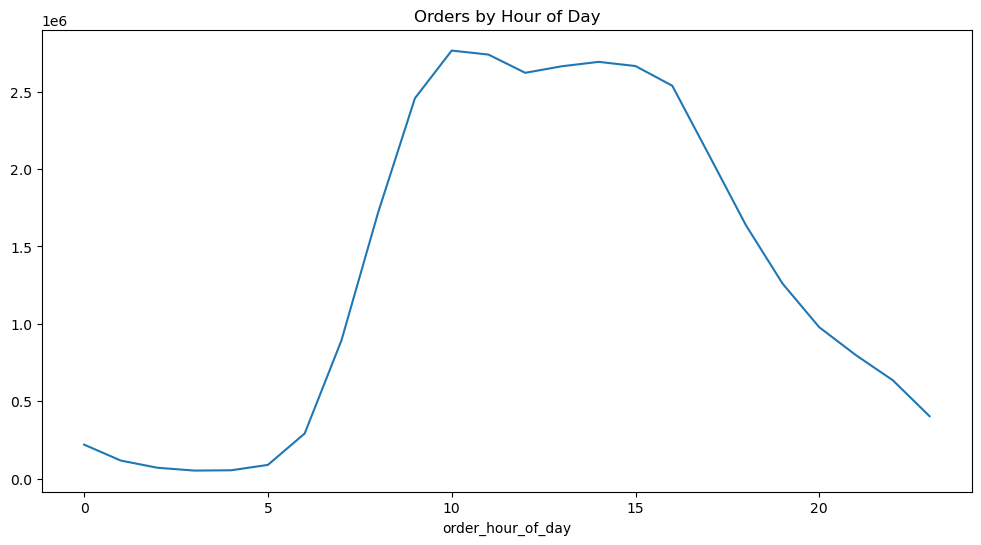

In [23]:
whole_day=complete_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=whole_day.index,y=whole_day.values)
plt.title("Orders by Hour of Day")
plt.show()


Orders in the Whole Week

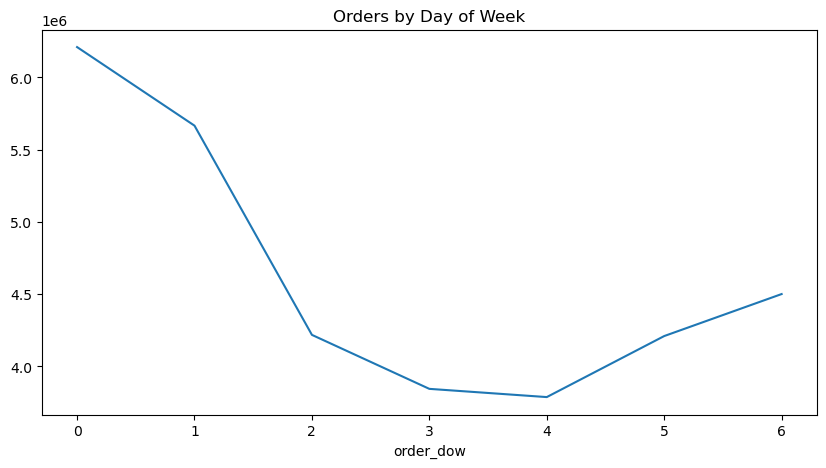

In [24]:
whole_week=complete_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=whole_week.index,y=whole_week.values)
plt.title("Orders by Day of Week")
plt.show()

In [25]:
# --- IGNORE ---

HANDLE MISSING VALUE

In [26]:
missing_value= complete_df.isnull().sum()
missing_value

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

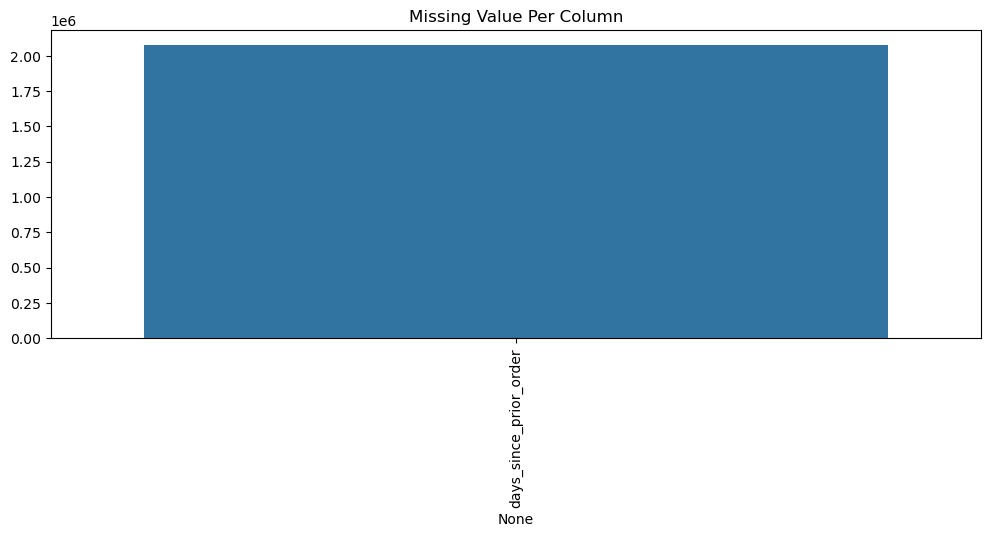

In [27]:
missing_count=complete_df.isnull().sum()
missing_count=missing_count[missing_count>0].sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing_count.index,y=missing_count.values)
plt.xticks(rotation=90)
plt.title("Missing Value Per Column")
plt.show()

In [28]:
print ("..")

..


3. Cleaning & Imputation

Median Imputation

In [29]:
from sklearn.impute import SimpleImputer
median_df=complete_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_df['days_since_prior_order']=median_imputer.fit_transform(median_df[['days_since_prior_order']])
median_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 Median Visualize

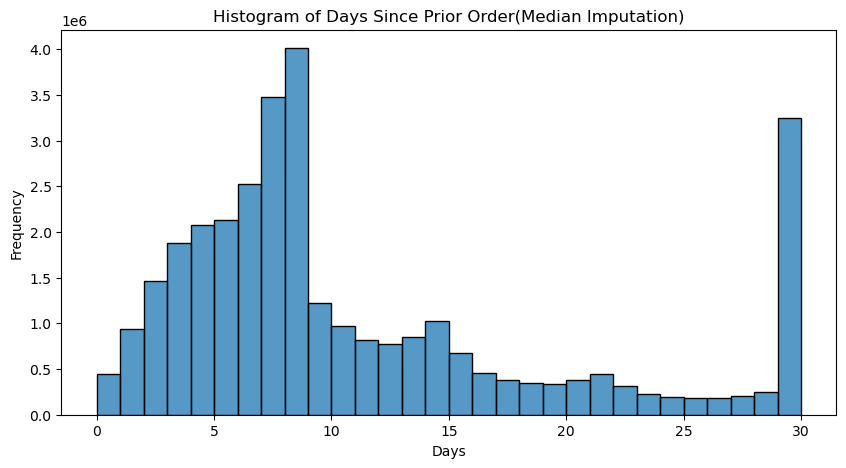

In [30]:
median_df.isnull().sum()
plt.figure(figsize=(10,5))
sns.histplot(median_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order(Median Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Most Frequent (Mode) Imputation

In [31]:
from sklearn.impute import SimpleImputer
freq_df=complete_df.copy()
freq_imputer = SimpleImputer(strategy='most_frequent')
freq_df['days_since_prior_order'] = freq_imputer.fit_transform(freq_df[['days_since_prior_order']])
freq_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Most Frequent (Mode) Visualize

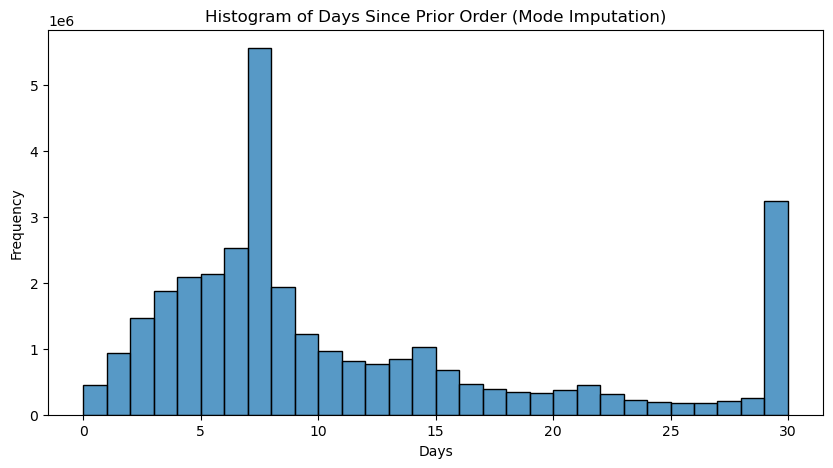

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(freq_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Mode Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Sentinel Imputation

In [33]:
from sklearn.impute import SimpleImputer
sentinel_df=complete_df.copy()
sentinel_vl=0
sentinel_df['days_since_prior_order']=sentinel_df['days_since_prior_order'].fillna(sentinel_vl)
sentinel_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Sentinel Visualize

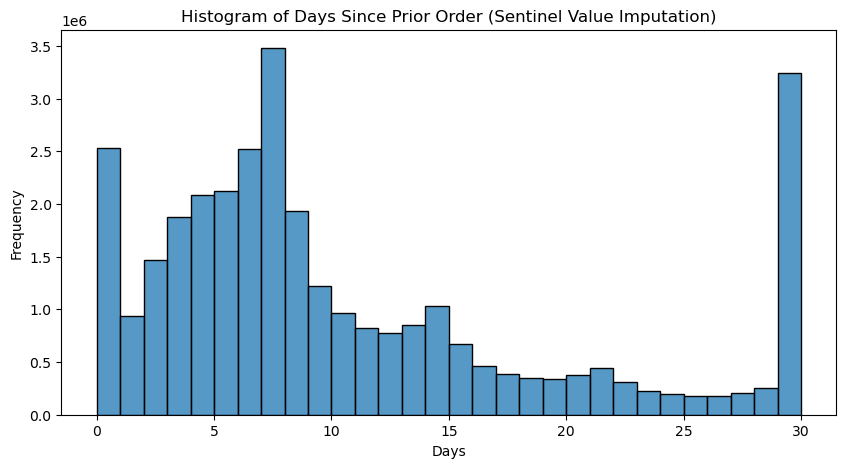

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(sentinel_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Sentinel Value Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Model-Based Imputation (KNN Imputer)

In [35]:
from sklearn.impute import KNNImputer
sample_knn = complete_df.sample(100000, random_state=42)
knn_imputer = KNNImputer(n_neighbors=5)
knn_sample_df = sample_knn.copy()
knn_sample_df[['days_since_prior_order']] = knn_imputer.fit_transform(knn_sample_df[['days_since_prior_order']])
knn_sample_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Model Based Visualize

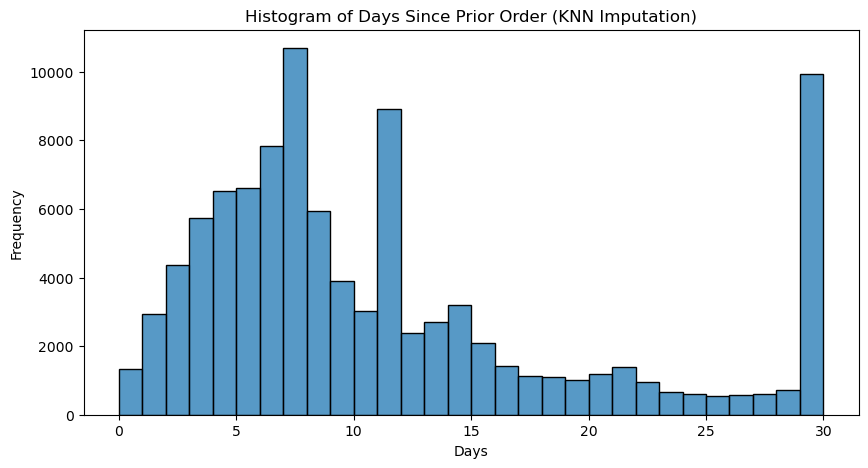

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(knn_sample_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (KNN Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [37]:
print("hkjkjhkj")

hkjkjhkj


3-Outlier Detection & Treatment (Z-Score Method)

In [38]:
outlier_columns = []
for col in complete_df.select_dtypes(include=['int', 'float']):
    Q1 = complete_df[col].quantile(0.25)
    Q3 = complete_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    if ((complete_df[col] < (Q1 - 1.5 * IQR)) | (complete_df[col] > (Q3 + 1.5 * IQR))).any():
        outlier_columns.append(col)

print("Outlier columns:", outlier_columns)


Outlier columns: ['add_to_cart_order', 'order_number', 'order_hour_of_day']


In [39]:
import numpy as np
mean_val =complete_df[outlier_columns].mean()
std_val  = complete_df[outlier_columns].std()
z_score = (complete_df[outlier_columns]- mean_val) / std_val
z_score


,add_to_cart_order,order_number,order_hour_of_day
0,-1.031488,-0.806502,-1.042062
1,-0.891170,-0.806502,-1.042062
2,-0.750852,-0.806502,-1.042062
3,-0.610534,-0.806502,-1.042062
4,-0.470216,-0.806502,-1.042062
...,...,...,...
32434484,-0.329898,0.391100,-1.748549
32434485,-0.189580,0.391100,-1.748549
32434486,-0.049262,0.391100,-1.748549
32434487,0.091056,0.391100,-1.748549



Extracting Outliers

In [40]:
outlier_z = z_score[(z_score > 3) | (z_score < -3)]
print(outlier_z.shape)
len(outlier_z)

(32434489, 3)


32434489

Boxplot Before Removing Outliers (Z-score) Visualize

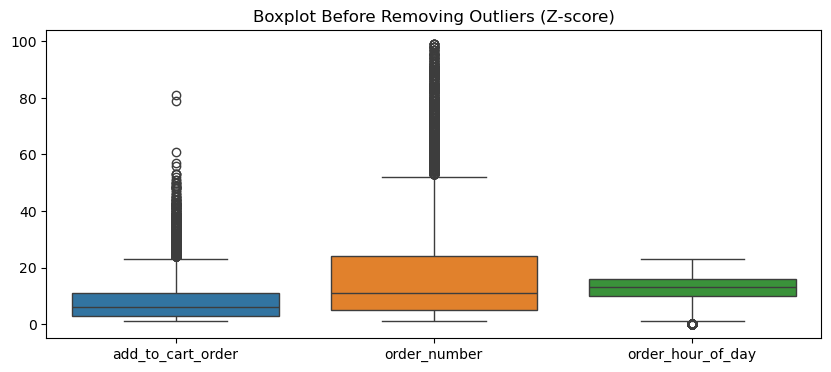

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sample_df=complete_df.sample(20000,random_state=42)
sns.boxplot(data=sample_df[outlier_columns])
plt.title("Boxplot Before Removing Outliers (Z-score)")
plt.show()


Histogram Before Removing Outliers (Z-score) Visualize

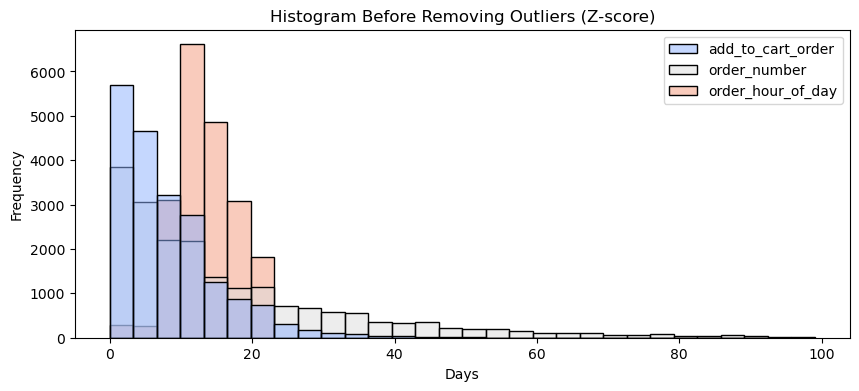

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(data=sample_df[outlier_columns], bins=30, kde=False,palette="coolwarm")
plt.title("Histogram Before Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Removing Outliers

In [43]:
clean_z_df =sample_df[(z_score <= 3) & (z_score >= -3)]
clean_z_df.shape

(20000, 15)

Boxplot After Removing Outliers

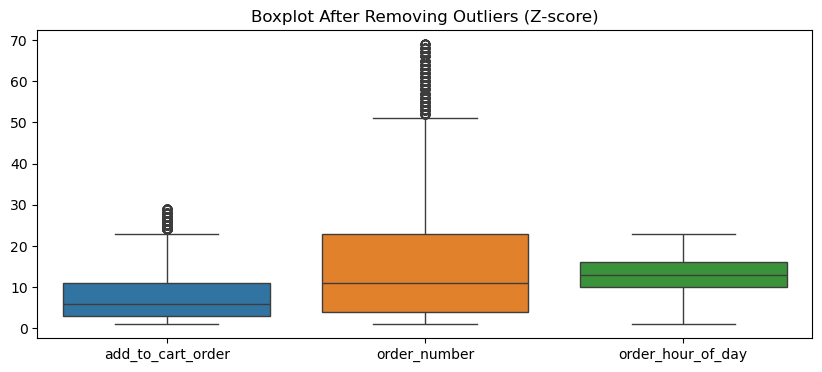

In [44]:
plt.figure(figsize=(10,4))
sns.boxplot(data=clean_z_df[outlier_columns])
plt.title("Boxplot After Removing Outliers (Z-score)")
plt.show()


Histogram After Removing Outliers

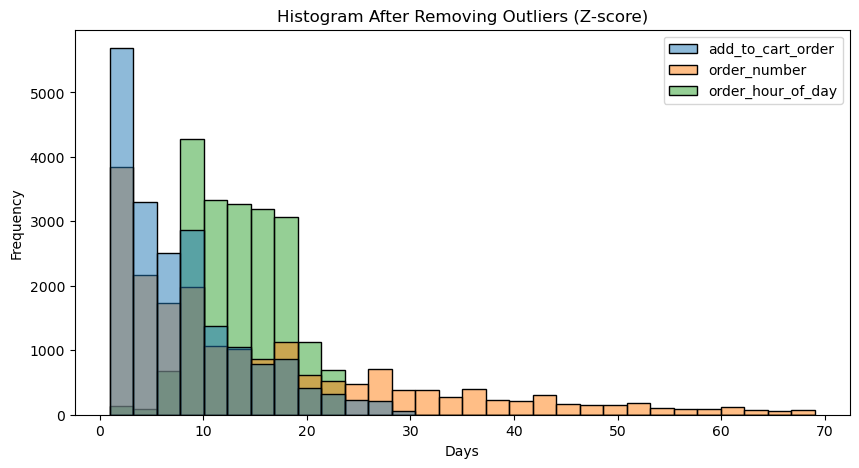

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=clean_z_df[outlier_columns], bins=30, kde=False)
plt.title("Histogram After Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

4-Encoding Categorical Variables

One-Hot Encoding (for low-cardinality categories)

In [46]:
model_df=complete_df.sample(200000,random_state=42)

In [47]:
low_card= ['department', 'aisle','eval_set']
one_hot_df = pd.get_dummies(model_df,columns=low_card,drop_first=True)
one_hot_df = one_hot_df.replace({True: 1, False: 0})
one_hot_df.head()

C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_28648\845161973.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_df = one_hot_df.replace({True: 1, False: 0})


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,135284,9,0,...,0,0,0,0,0,0,0,0,0,0
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,7293,2,4,...,0,0,0,0,0,0,0,0,0,0
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,111385,2,1,...,0,0,0,0,0,0,0,0,0,0
15909397,1678630,8859,2,1,Natural Spring Water,115,7,147365,7,0,...,0,0,0,0,0,0,0,1,0,0
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,99290,7,0,...,0,0,0,0,0,0,0,0,0,0


Target / Mean Encoding (with smoothing + CV leakage protection) for high cardinality (product_id, user_id)

In [48]:
from sklearn.model_selection import KFold
df= model_df.copy()
target='reordered'#اللي بدنا نحسب متوسطه 
global_mean=df[target].mean()
global_mean


np.float64(0.59013)

In [49]:

from sklearn.model_selection import KFold

def target_simple_encod(df, target, cat_column, n_splits=5, alpha=10):
    encoded_col = pd.Series(index=df.index, dtype=float)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    global_mean = df[target].mean()

    for train_index, val_index in kf.split(df):
        train_data = df.iloc[train_index]
        val_data = df.iloc[val_index]

        category_means = train_data.groupby(cat_column)[target].mean()
        category_counts = train_data.groupby(cat_column)[target].count()

        smooth_means = (category_means * category_counts + global_mean * alpha) / (category_counts + alpha)

        encoded_col.iloc[val_index] = val_data[cat_column].map(smooth_means).fillna(global_mean)

    df[cat_column + "_encoded_smooth"] = encoded_col
    return df


target_columns = ["product_id", "user_id"]

for col in target_columns:
    model_df = target_simple_encod(model_df, target, col, n_splits=5, alpha=10)

model_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_encoded_smooth,user_id_encoded_smooth
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,prior,9,0,19,8.0,0.590130,0.635807
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,prior,2,4,15,1.0,0.706650,0.627391
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,prior,2,1,17,8.0,0.741691,0.575108
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,prior,7,0,14,26.0,0.717105,0.627391
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,prior,7,0,19,30.0,0.590130,0.590130


Frequency Encoding

In [50]:
for columns in target_columns:
    freq_encod= model_df[columns].value_counts()/len(model_df)
    model_df[columns + '_freq_encod']= model_df[columns].map(freq_encod)
model_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_encoded_smooth,user_id_encoded_smooth,product_id_freq_encod,user_id_freq_encod
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,prior,9,0,19,8.0,0.590130,0.635807,0.000005,0.000030
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,prior,2,4,15,1.0,0.706650,0.627391,0.001930,0.000010
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,prior,2,1,17,8.0,0.741691,0.575108,0.002405,0.000020
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,prior,7,0,14,26.0,0.717105,0.627391,0.000675,0.000010
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,prior,7,0,19,30.0,0.590130,0.590130,0.000005,0.000005


5. Feature Scaling

Feature Scaling("StandardScaler")

In [51]:
from sklearn.preprocessing import StandardScaler
standard_df=model_df.copy()
scaler=StandardScaler()
standard_df[num_cols]=scaler.fit_transform(model_df[num_cols])
standard_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_encoded_smooth,user_id_encoded_smooth,product_id_freq_encod,user_id_freq_encod
29481110,1.418848,0.606633,1.064414,-1.199916,Crushed Red Chili Pepper,0.858366,0.487884,pantry,spices seasonings,0.544513,prior,-0.464942,-1.306901,1.309637,-0.353320,0.590130,0.635807,0.000005,0.000030
2852353,-1.430084,1.162765,-0.471786,-1.199916,Organic Tomato Cluster,0.308558,-0.946696,produce,fresh vegetables,-1.609301,prior,-0.865898,0.605888,0.370054,-1.151614,0.706650,0.627391,0.001930,0.000010
11194500,-0.536527,1.383490,-0.052822,-1.199916,Honeycrisp Apple,-1.236142,-0.946696,produce,fresh fruits,0.142345,prior,-0.865898,-0.828704,0.839846,-0.353320,0.741691,0.575108,0.002405,0.000020
15909397,-0.032550,-1.181265,-0.890749,0.833392,Natural Spring Water,1.146361,-0.468503,beverages,water seltzer sparkling water,0.747811,prior,-0.579500,-1.306901,0.135159,1.699434,0.717105,0.627391,0.000675,0.000010
6101870,-1.082111,-0.053416,-0.890749,-1.199916,"PODS Laundry Detergent, Ocean Mist Designed fo...",0.099107,1.125475,household,laundry,-0.061188,prior,-0.579500,-1.306901,1.309637,2.155601,0.590130,0.590130,0.000005,0.000005


Feature Scaling("MinMaxScaler")

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max_df=model_df.copy()
MMS=MinMaxScaler()
min_max_df[num_cols]=MMS.fit_transform(model_df[num_cols])
min_max_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,product_id_freq_encod,user_id_freq_encod,user_total_orders,user_avg_basket,user_reorder_ratio,user_mean_days,user_last_order_recency,product_reorder_rate,product_avg_cart_pos,product_popularity
29481110,0.908855,0.686256,0.137615,0.0,Crushed Red Chili Pepper,0.774436,0.60,pantry,spices seasonings,0.656053,...,0.000005,0.000030,5,1.2,0.666667,8.000000,33,0.000000,16.000000,1
2852353,0.087997,0.844265,0.036697,0.0,Organic Tomato Cluster,0.616541,0.15,produce,fresh vegetables,0.035358,...,0.001930,0.000010,2,1.0,0.500000,2.000000,6,0.704663,8.673575,386
11194500,0.345456,0.906978,0.064220,0.0,Honeycrisp Apple,0.172932,0.15,produce,fresh fruits,0.540154,...,0.002405,0.000020,4,1.0,0.250000,7.333333,34,0.731809,7.577963,481
15909397,0.490666,0.178276,0.009174,1.0,Natural Spring Water,0.857143,0.30,beverages,water seltzer sparkling water,0.714640,...,0.000675,0.000010,2,1.0,1.000000,20.500000,17,0.725926,4.288889,135
6101870,0.188257,0.498722,0.009174,0.0,"PODS Laundry Detergent, Ocean Mist Designed fo...",0.556391,0.80,household,laundry,0.481499,...,0.000005,0.000005,1,1.0,0.000000,30.000000,7,0.000000,2.000000,1


In [62]:
model_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,product_id_freq_encod,user_id_freq_encod,user_total_orders,user_avg_basket,user_reorder_ratio,user_mean_days,user_last_order_recency,product_reorder_rate,product_avg_cart_pos,product_popularity
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,...,0.000005,0.000030,5,1.2,0.666667,8.000000,33,0.000000,16.000000,1
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,...,0.001930,0.000010,2,1.0,0.500000,2.000000,6,0.704663,8.673575,386
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,...,0.002405,0.000020,4,1.0,0.250000,7.333333,34,0.731809,7.577963,481
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,...,0.000675,0.000010,2,1.0,1.000000,20.500000,17,0.725926,4.288889,135
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,...,0.000005,0.000005,1,1.0,0.000000,30.000000,7,0.000000,2.000000,1


6- Feature Enginnering

-User Level Features

In [73]:
model_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,user_avg_basket,user_reorder_ratio,user_mean_days,user_last_order_recency,product_reorder_rate,product_avg_cart_pos,product_popularity,user_prod_purchase_count,user_prod_last_purchase_day,user_prod_reorder_rate
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,...,1.2,0.666667,8.000000,33,0.000000,16.000000,1,1,8.0,0.0
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,...,1.0,0.500000,2.000000,6,0.704663,8.673575,386,1,1.0,0.0
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,...,1.0,0.250000,7.333333,34,0.731809,7.577963,481,1,8.0,0.0
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,...,1.0,1.000000,20.500000,17,0.725926,4.288889,135,1,26.0,1.0
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,...,1.0,0.000000,30.000000,7,0.000000,2.000000,1,1,30.0,0.0


In [ ]:
user_orders = model_df.groupby("user_id")["order_id"].nunique() #جإجمالي عدد الطلبات الفريده 
basket_size = model_df.groupby(["user_id", "order_id"]).size().groupby("user_id").mean() #حساب لمتوسط حجم السلة لكل مستخدم
user_reorder_ratio = model_df.groupby("user_id")["reordered"].mean() #ححساب نسبه اعادة طلب لهاد اليوزر 
mean_days = model_df.groupby("user_id")["days_since_prior_order"].mean()#حسب متوسط الفاصل الزمني بين طلبات المستخدم
last_order = model_df.groupby("user_id")["order_number"].max() #جاب آخر رقم طلب لكل مستخدم

model_df["user_total_orders"] = model_df["user_id"].map(user_orders) #رإضافة عمود جديد لعدد الطلبات الفريدة لكل مستخدم
model_df["user_avg_basket"] = model_df["user_id"].map(basket_size) # لإضافة عمود جديد لحجم السلة (عدد العناصر في كل طلب)
model_df["user_reorder_ratio"] = model_df["user_id"].map(user_reorder_ratio) #حسب نسبة المنتجات المعاد طلبها لكل مستخدم
model_df["user_mean_days"] = model_df["user_id"].map(mean_days) #متوسط عدد الأيام بين طلبات المستخدم الواحد و رجّع المتوسط الخاص بكل صف
model_df["user_last_order_recency"] = model_df["user_id"].map(last_order)
model_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,product_id_freq_encod,user_id_freq_encod,user_total_orders,user_avg_basket,user_reorder_ratio,user_mean_days,user_last_order_recency,product_reorder_rate,product_avg_cart_pos,product_popularity
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,...,0.000005,0.000030,5,1.2,0.666667,8.000000,33,0.000000,16.000000,1
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,...,0.001930,0.000010,2,1.0,0.500000,2.000000,6,0.704663,8.673575,386
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,...,0.002405,0.000020,4,1.0,0.250000,7.333333,34,0.731809,7.577963,481
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,...,0.000675,0.000010,2,1.0,1.000000,20.500000,17,0.725926,4.288889,135
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,...,0.000005,0.000005,1,1.0,0.000000,30.000000,7,0.000000,2.000000,1


- Product-level features

In [72]:
product_reorder_rate = model_df.groupby("product_id")["reordered"].mean() # نسبة المرات اللي تم فيها إعادة شراء هذا المنتج من إجمالي مرات شرائه
avg_cart_position = model_df.groupby("product_id")["add_to_cart_order"].mean() #المتوسط العام لترتيب إضافة المنتج داخل السلة
product_popularity = model_df.groupby("product_id")["order_id"].count() #عدد المرات التي ظهر فيها المنتج في الطلبات.
#ذا يعطي عدد المرات التي تم فيها شراء المنتج من قبل أي مستخدم

model_df["product_reorder_rate"] = model_df["product_id"].map(product_reorder_rate) # نضيف المعدل لكل صف حتى يستخدمه المودل.
model_df["product_avg_cart_pos"] = model_df["product_id"].map(avg_cart_position) #نربط هذا السلوك بكل ظهور للمنتج
model_df["product_popularity"] = model_df["product_id"].map(product_popularity) #نضيف الشعبية لكل صف.



User×Product interaction features

In [71]:
user_prod_purchase_count = model_df.groupby(["user_id", "product_id"])['order_id'].count()
last_purchase_day = model_df.groupby(['user_id', 'product_id'])['days_since_prior_order'].max()
user_prod_reoder=model_df.groupby(['user_id', 'product_id'])['reordered'].mean()

model_df['user_prod_purchase_count'] = model_df.groupby(['user_id', 'product_id'])['order_id'].transform('count')
model_df['user_prod_last_purchase_day'] = model_df.groupby(['user_id', 'product_id'])['days_since_prior_order'].transform('max')
model_df['user_prod_reorder_rate'] = model_df.groupby(['user_id', 'product_id'])['reordered'].transform('mean')
model_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,user_avg_basket,user_reorder_ratio,user_mean_days,user_last_order_recency,product_reorder_rate,product_avg_cart_pos,product_popularity,user_prod_purchase_count,user_prod_last_purchase_day,user_prod_reorder_rate
29481110,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,...,1.2,0.666667,8.000000,33,0.000000,16.000000,1,1,8.0,0.0
2852353,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,...,1.0,0.500000,2.000000,6,0.704663,8.673575,386,1,1.0,0.0
11194500,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,...,1.0,0.250000,7.333333,34,0.731809,7.577963,481,1,8.0,0.0
15909397,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,...,1.0,1.000000,20.500000,17,0.725926,4.288889,135,1,26.0,1.0
6101870,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,...,1.0,0.000000,30.000000,7,0.000000,2.000000,1,1,30.0,0.0


Temporal features

In [ ]:
model_df['order_hour']=model_df['order_hour_of_day']#Hour

model_df['order_day']=model_df['order_dow']#Day

start_year=2024
days_per_year=365
model_df['order_year'] = start_year +model_df['days_since_prior_order']//days_per_year #Year
model_df['order_month'] = ((model_df['days_since_prior_order'] % days_per_year) // 30) + 1 #Month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
model_df['order_season'] = model_df['order_month'].apply(get_season)#Season



#Holiday 